In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [3]:
df['status'].unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

In [4]:
df.dtypes

client_id         float64
sum               float64
status             object
sale               object
new/current        object
Unnamed: 5        float64
document           object
receiving_date     object
dtype: object

#### 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

Сделкой будем считать любую запись в таблице за июль,
которая не была просрочена (независимо от наличия оригинала документов).

In [5]:
#Определим индексы c месяцами сделок
may = int(df.index[df["status"] == "Май 2021"].values) 
june = int(df.index[df["status"] == "Июнь 2021"].values) 
july = int(df.index[df["status"] == "Июль 2021"].values) 
august = int(df.index[df["status"] == "Август 2021"].values)
september = int(df.index[df["status"] == "Сентябрь 2021"].values) 
october = int(df.index[df["status"] == "Октябрь 2021"].values) 

months = [may, june, july, august, september, october]

In [6]:
#Все сделки за июль 
df1 = df[['sum', 'status']][july+1 : august]
df1

,sum,status
259,13838.7,ОПЛАЧЕНО
260,1586.5,ОПЛАЧЕНО
261,2996.7,ОПЛАЧЕНО
262,4313.7,ОПЛАЧЕНО
263,19407.7,ОПЛАЧЕНО
...,...,...
364,4878.7,ОПЛАЧЕНО
365,11703.7,ОПЛАЧЕНО
366,1977.7,ПРОСРОЧЕНО
367,4048.7,ОПЛАЧЕНО


In [7]:
# Выручка за июль по всем сделкам, которые не были просрочены
res1 = df1['sum'][df1['status'] != 'ПРОСРОЧЕНО'].sum()
print("Общая выручка за июль 2021 без просрочек:", round(res1, 2), "рублей.")

Общая выручка за июль 2021 без просрочек: 859896.47 рублей.


#### 2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

Здесь аналогично – не будем учитывать записи, по которым просрочен платеж

In [8]:
# Сохраним в список выручку за каждый месяц
revenue = []
for i in range(len(months)-1):
    df2 = df[['sum', 'status']][months[i]+1 : months[i+1]]
    revenue.append(df2['sum'][df2['status'] != 'ПРОСРОЧЕНО'].sum())

df2 = df[['sum', 'status']][months[-1]+1 :]
revenue.append(df2['sum'][df2['status'] != 'ПРОСРОЧЕНО'].sum())

In [9]:
month_names = ["Май", "Июнь", "Июль", "Август", "Сентябрь", "Октябрь"]
for r, m in zip(revenue, month_names):
    print(f"Выручка за {m}:", round(r, 2), "рублей")

Выручка за Май: 800668.49 рублей
Выручка за Июнь: 801442.41 рублей
Выручка за Июль: 859896.47 рублей
Выручка за Август: 785467.99 рублей
Выручка за Сентябрь: 783616.78 рублей
Выручка за Октябрь: 708690.24 рублей


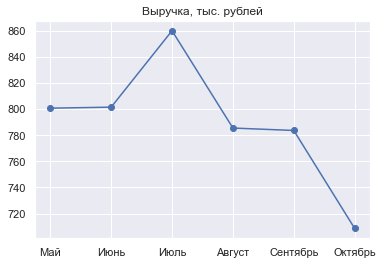

In [10]:
sns.set_theme()
plt.plot([r / 1000 for r in revenue], marker='.', markersize=12)
plt.xticks(np.arange(len(months)), month_names)
plt.title("Выручка, тыс. рублей")
plt.show()

#### 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

Не совсем очевидно, что подразумевается под словом привлек, поэтому аналогично будем рассматривать только сделки без просроченной оплаты. 

In [11]:
df3 = df[september+1 : october][["sum", "status", "sale"]] 
df3 = df3[df3['status'] != 'ПРОСРОЧЕНО']
df3

,sum,status,sale
485,14288.7,ОПЛАЧЕНО,Иванов
486,1494.0,ОПЛАЧЕНО,Иванов
487,893.7,ОПЛАЧЕНО,Кузнецова
488,18142.7,ОПЛАЧЕНО,Андреев
489,3833.7,В РАБОТЕ,Филимонова
...,...,...,...
589,1313.7,ОПЛАЧЕНО,Андреев
590,3453.7,ОПЛАЧЕНО,Васильев
591,4328.7,ОПЛАЧЕНО,Васильев
592,4078.7,ОПЛАЧЕНО,Филимонова


In [12]:
res3 = df3.groupby('sale', as_index=False).sum()
res3

,sale,sum
0,Андреев,130983.80
1,Васильев,45416.75
2,Иванов,94770.60
3,Кузнецова,72228.40
4,Михайлов,4268.70
5,Петрова,119724.86
6,Смирнов,221525.70
7,Соколов,35183.50
8,Филимонова,59514.47


In [13]:
res3 = df3['sale'][df3['sum'] == df3['sum'].max()].values[0]
print("Больше всего денежных средств в сентябре 2021 года привлек", res3)

Больше всего денежных средств в сентябре 2021 года привлек Смирнов


#### 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

Будем рассчитывать преобладающие сделки по их количеству (хотя можно еще рассмотреть сумму выручки по каждому из типов).

In [14]:
df4 = df[october+1 :][["new/current"]] \
    .groupby(['new/current'])['new/current'] \
    .count()
df4

new/current
новая      36
текущая    99
Name: new/current, dtype: int64

In [15]:
print("В октябре 2021 года преобладал тип сделки:", df4.index[np.argmax(df4.values)])

В октябре 2021 года преобладал тип сделки: текущая


#### 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [16]:
df5 = df[may+1 : june].astype({"receiving_date": str})

res5 = df5["receiving_date"] \
    .str.contains("2021-06-", regex=False) \
    .value_counts()

print("В июне по майским сделкам было получено", res5[True], "оригиналов")

В июне по майским сделкам было получено 77 оригиналов


### Задание:
За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

(Если я правильно понял задание):

Необходимо вычислить для каждого менеджера сумму бонусов по сделкам, которые произошли до июля месяца, но оригиналы которых придут после 1 июля.

In [17]:
# Будем рассматривать данные до июля (не включая), удалив пропуски в дате получения оригиналов
df_new = df[2:july].copy()
df_new = df_new[2:].dropna(subset=['receiving_date'])
df_new['bonus'] = 0
df_new

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,bonus
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07 00:00:00,0
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-07-15 00:00:00,0
7,21.0,3613.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-13 00:00:00,0
8,23.0,8511.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-06-08 00:00:00,0
...,...,...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,NaN,оригинал,2021-07-22 00:00:00,0
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,NaN,оригинал,2021-07-16 00:00:00,0
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,NaN,оригинал,2021-09-08 00:00:00,0
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-07-22 00:00:00,0


In [18]:
df_new['receiving_date'] = df_new['receiving_date'].astype(str)
#Выбор тех сделок, оригиналы которых пришли начиная с 1 июля
residue_day = '2021-07-01 00:00:00'
df_new = df_new[(df_new['receiving_date'] >= residue_day)]

In [19]:
#Определяем индексы для 3 типов бонусов
type_1 = df_new.index[(df_new['status'] == 'ОПЛАЧЕНО') \
                    & (df_new['document'] == 'оригинал')
                    & (df_new['new/current'] == 'новая')].tolist()

type_2 = df_new.index[(df_new['status'] != 'ПРОСРОЧЕНО') \
                    & (df_new['sum']  > 10000)
                    & (df_new['new/current'] == 'текущая')
                    & (df_new['document'] == 'оригинал')].tolist()

type_3 = df_new.index[(df_new['status'] != 'ПРОСРОЧЕНО') \
                    & (df_new['sum'] <= 10000)
                    & (df_new['new/current'] == 'текущая')
                    & (df_new['document'] == 'оригинал')].tolist()

# Проверка на отсутствие пересечения в индексах
set(type_1) & set(type_2) & set(type_3)

set()

In [20]:
# Заполняем столбец ожидаемых бонусов за сделку
df_new.loc[type_1, "bonus"] = 0.07 * df_new.loc[type_1, "sum"]
df_new.loc[type_2, "bonus"] = 0.05 * df_new.loc[type_2, "sum"]
df_new.loc[type_3, "bonus"] = 0.03 * df_new.loc[type_3, "sum"]

/Users/petrovich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [21]:
residue = df_new[["sale", "bonus"]] \
    .groupby("sale", as_index=False) \
    .sum().round(2) \
    .rename(columns={"sale": "Менеджер" ,"bonus": "Остаток"})
residue

,Менеджер,Остаток
0,Андреев,3945.83
1,Васильев,1037.05
2,Иванов,5991.45
3,Кузнецова,4496.95
4,Петрова,10389.06
5,Селиванов,5297.69
6,Смирнов,6430.26
7,Соколов,269.21
8,Филимонова,2317.96
